# Tarea_15
## Francisco Ricardo Torres Arvizu


## __Ejercicio 1:__ 
Crear la libreria herramientas dentro de su carpeta de tareas, en su repositorio. Dentro deberán poner los métodos de Newton que construyeron, los métodos de integración, Euler independiente de dimensión (implícito y explícito)y Runge-Kutta independiente de dimensión. Recuerden que las rutinas deben funcionar solo con sus argumentos, no debe haber variables globales, todo lo que necesite la función para trabajar debe ser un argumento o una variable definida internamente.
* Las rutinas tienen que llevar su documentación.
* Crearán el notebook de la __tarea 15 (para el Martes 17)__ y en el llamarán a su libreria con el comando `import`.
* Deberán demostrar que sus rutinas funcionan bien, no se necesitan tests extensos, basta con que muestren que si _corren_ las rutinas.

## Solución

In [1]:
__precompile__()
module herramientas
export espaaciofaserungeKutta2e
"""Esta funcion sirve para resover númericamente ecuaciones diferenciales por el método de Runge-Kutta, ya sean sistemas o de cualquier orden orden. 
La función recibecomo argumentos (f,t0,t,y0,delta) una función (f),los puntos incial y final del intervalo [t0,tf], las condiciones inciales (y0), y el tamaño de paso (delta). 
La función devuelve un arreglo con el intervalo [t0,tf] , un arreglo con la solución y un arreglo con la derivada en cada punto, es perfecta para hacer espacios fase  """
function espaaciofaserungeKutta2e(f,t0,tf,y0,delta)
   dyarreglo=[]
    yArreglo = []
    tArreglo=[]
    push!(yArreglo,y0)
    push!(tArreglo,t0)
    push!(dyarreglo,f(t0,y0))
    k1(t,y) = f(t,y)
    k2(t,y) = f(t+(delta/2),y+((delta/2)*k1(t,y)))
    k3(t,y) = f(t+(delta/2),y+((delta/2)*k2(t,y)))
    k4(t,y) = f(t+(delta),y+(delta)*k3(t,y))
    h1(t,y)=k1(t,y)+2*k2(t,y)+2*k3(t,y)+k4(t,y)
    while (tArreglo[length(tArreglo)]<tf)
        push!(tArreglo,tArreglo[length(tArreglo)]+delta)
        push!(yArreglo,yArreglo[length(yArreglo)]+(delta/6)*h1(tArreglo[length(tArreglo)-1],yArreglo[length(yArreglo)]))
        push!(dyarreglo,f(tArreglo[length(tArreglo)-1],yArreglo[length(yArreglo)-1]))
    end
   return [tArreglo, yArreglo, dyarreglo]
end

export riemman
""""Esta función da una integral númerica usando la definición integral de Riemman.
Recibe como argumentos (a,b,f,n) el limite inferior (a), el limite superior (b), la función (f),  así como el tamaño de la partición (n)."""


function riemman(a,b, f::Function,n::Int64)

    deltax=(b-a)/n
    S=0.0
    xo=a
    So=0.0
   xn=0.0
    m=1
   for i in 1:n-1
        xm=a+m*deltax
        
        S+=f(xm)
        m=m+1
        xo=xm
        So=S
    
       
    end 
    Sf=S*(b-a)/n
    return Sf
end 
export Simpson
"""Esta función integra numéricamente la función f(x) en el intervalo [a,b] usando la regla  de Simpson. 
Recibe como argumentos (a,b,f,n) el limite inferior (a), el limite superior (b), la función (f),  así como el tamaño de la partición (n). """
function Simpson(a,b, f,n)

    deltax=(b-a)/n
    S=0.0
    xm=0.0
    So=0.0
    x0=a
    x1=0.0
   for i in 1:n-1
        x1=a+i*deltax
        xm=(x1+x0)*(1/2)
        S=(deltax/6)*(f(x0)+4*f(xm)+f(x1))+So
        So=S
        x0=x1
    end
     
    return So
end 
export eulerFunction
""" Esta función aplica el método de Euler independiente de la dimensión a una función.
La función recibe como argumentos (f,time0,timef,y0,delta) la función (f),los puntos incial (time0) y final del intervalo (timef), [t0,tf], las condiciones inciales (y0), y el tamaño de paso (delta). 
La función devuelve un arreglo con el intervalo y un arreglo con la solución, aunque habra que extraer la solución si la dimensión es mayor a 1 .  """
function eulerFunction(f,time0,timef,y0,delta)
    #Se declaran dos arreglos a los cuales iremos agregando los valores calculados de t y y
    yarreglo=[]
    tarreglo=[]
    
    push!(tarreglo,time0)
    push!(yarreglo,y0)
  
    while(tarreglo[length(tarreglo)]<timef)
        
        
        push!(tarreglo,tarreglo[length(tarreglo)]+delta)
        push!(yarreglo,yarreglo[length(yarreglo)]+f(tarreglo[length(tarreglo)-1],yarreglo[length(yarreglo)])*delta)
        
    end
   return [tarreglo,yarreglo]

end
export trapecio
"""Esta función integra numéricamente la función f(x) en el intervalo [a,b] usando la regla  del trapecio. 
Recibe como argumentos (f,a,b,n) que son   el limite inferior (a), el limite superior (b), la función f, así como el tamaño de la partición n."""
function trapecio(a,b, f::Function,n::Int64)

    deltax=(b-a)/n
    S=0.0
    So=f(a)+f(b)
   
   for i in 1:n-1
        xm=a+i*deltax
        
        S+=2*f(xm)
        
        
        So=S
     
       
    end 
    Sf=S*(b-a)/2n
    return Sf
end 
Pkg.add("SymPy")
using SymPy
A,x,a,n,m,xi,x1=symbols("A,x,a,n,m,xi,x1")
export dif
""" Esta función te permite obtener una derivada simbólica respecto a la variable x"""
function dif(f::Function)

 
    df= diff(f(x),x)

return df
end 
export dif2
""" Esta función te permite obtener una derivada simbólica respecto a la variable xpara el método de Euler implítcito"""
function dif2(f::Function)

 
    df= diff(f(x1),x1)

return df
end 
export newton1
""" Esta función aplica el método de Newton si se da una condición inicial."""

function newton1(f,w0) #se crea una funcion que tome los parametros que reuiera la ecuacion par solucionarse  
    w1=w0
    d=herramientas.dif(f)
    df=lambdify( d,[x]);
    w2=0.0
    tolerancia=0.000000000001
    error=0.001
    raices=[]
    while error >  tolerancia
        w2=w1-(f(w1)/df(w1))
        error=abs(w2-w1)
        w1=w2
       
    end 
    return w1
end
export b
""" Esta función retira las raices repetidas en un arreglo"""
function b(x)
n=length(x)
    t=[]
    push!(t,x[1])
    for i in 1:n
       if x[i] ∉ t
          push!(t,x[i])  
    
       end 
    end
   return t 
    
 end
export buscadoraderaices
""" Esta función retira las raices repetidas en un arreglo"""
function buscadoraderaices(x)
n=length(x)
    raicesrepetidas=[]
    y=0.0
    epsilon=0.00000001
    push!(raicesrepetidas,x[1])
    for i in 2:n
         y=x[i]
        v=x[i-1]
          if abs(y-v)>epsilon
         
            push!(raicesrepetidas,y)
        end   
      end 
    return raicesrepetidas
end 
export newton3
"""Método de Newton especial para el método de Euler implícito."""
function newton3(f::Function,w0) #se crea una funcion que tome los parametros que reuiera la ecuacion par solucionarse  
    w1=w0
    d=dif(f)
    df=lambdify( d,[x1]);
    w2=0.0
    tolerancia=0.000000000001
    error=0.001
    raices=[]
    while error >  tolerancia
        w2=w1-(f(w1)/df(w1))
        error=abs(w2-w1)
        w1=w2
       
    end 
    return w1
end
export eulerFunctionimplicita
""" Esta función aplica el método de Euler implícito.
Recibe como argumentos (f,a,b,n) que son la función f, el limite inferior (a), el limite superior (b), así como el tamaño de la partición n.
Devuelve un arreglo con el intervalo y un arreglo con la solución. """
function eulerFunctionimplicita(f,time0,timef,y0,delta)
    #Se declaran dos arreglos a los cuales iremos agregando los valores calculados de t y y
    yarreglo=[]
    tarreglo=[]
    
    push!(tarreglo,time0)
    push!(yarreglo,y0)
  
    while(tarreglo[length(tarreglo)]<timef)
        
        push!(tarreglo,tarreglo[length(tarreglo)]+delta)
        g(x1)=x1-yarreglo[length(yarreglo)]-delta*f(tarreglo[length(tarreglo)],x1)
        y1=newton3(lambdify(g(x1),[x1]),tarreglo[length(tarreglo)])
        push!(yarreglo,y1)
        
    end
    return [tarreglo,yarreglo]
end
export newton2
""" Esta función aplica el método de Newton si se da un arreglo inicial."""
function newton2(f,  w0) #se crea una funcion que tome los parametros que reuiera la ecuacion par solucionarse
   n=length(w0)
   raices=[]
    y=zeros(1,n)
    w1=0.0
      d=herramientas.dif(f)
    t=zeros(1,n)
    df=lambdify( d,[x]);   
    for i in 1:n
        w1=w0[i]

        for j in 1:300
        
             w1=w1-(f(w1)/df(w1))
        
        end 
        push!(raices,w1)
    end 
    y= herramientas.buscadoraderaices(raices)
  t=herramientas.b(y)
    return t
end 

export  newtongneral
""" Esta función aplica el método de Newton si se da un arreglo inicial o punto. Requiere como argumentos (f,w0) que son la función (f) y la condición incial (w0) como entradas (f,w0). En casp"""
function newtongneral(f::Function,  w0)
   solucion=0.0
    if ndims(w0)==0
        solucion=herramientas.newton1(f,w0)
    else
        solucion=herramientas.newton2(f,w0)
    end 
    
    return solucion
end
end

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


herramientas

In [2]:
using herramientas

In [3]:
using PyPlot

## Pruebas

### Método de Newton 

In [4]:
herramientas.newton1(x->cos(x), 5)

  likely near In[4]:1
  likely near In[4]:1
  likely near In[4]:1
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


4.71238898038469

In [5]:
 c=linspace(-10,10,10)


-10.0:2.2222222222222223:10.0

In [6]:
herramientas.newtongneral(x->cos(x), c)

8-element Array{Any,1}:
 -10.9956 
  -7.85398
  -4.71239
  -1.5708 
   1.5708 
   7.85398
   4.71239
  10.9956 

In [7]:
?herramientas.newtongneral

Esta función aplica el método de Newton si se da un arreglo inicial o punto. Requiere como argumentos (f,w0) que son la función (f) y la condición incial (w0) como entradas (f,w0). En casp


### Método de Euler

In [8]:
herramientas.eulerFunction((t,x)->[x[2]-(x[2])^3,-x[1]-(x[2])^2]
,-5,5,[-0.5,0.7],0.0001)


2-element Array{Array{Any,1},1}:
 Any[-5, -4.9999, -4.9998, -4.9997, -4.9996, -4.9995, -4.9994, -4.9993, -4.9992, -4.9991  …  4.9991, 4.9992, 4.9993, 4.9994, 4.9995, 4.9996, 4.9997, 4.9998, 4.9999, 5.0]                                                                                                                                                                                                                                                                                                     
 Any[[-0.5, 0.7], [-0.499964, 0.700001], [-0.499929, 0.700002], [-0.499893, 0.700003], [-0.499857, 0.700004], [-0.499822, 0.700005], [-0.499786, 0.700006], [-0.49975, 0.700007], [-0.499714, 0.700008], [-0.499679, 0.700009]  …  [-0.0172715, 0.515159], [-0.0172337, 0.515134], [-0.0171958, 0.515109], [-0.017158, 0.515084], [-0.0171202, 0.515059], [-0.0170823, 0.515035], [-0.0170445, 0.51501], [-0.0170066, 0.514985], [-0.0169688, 0.51496], [-0.016931, 0.514935]]

In [9]:
xcomp(x)=x[1]
ycomp(x)=x[2]

ycomp (generic function with 1 method)

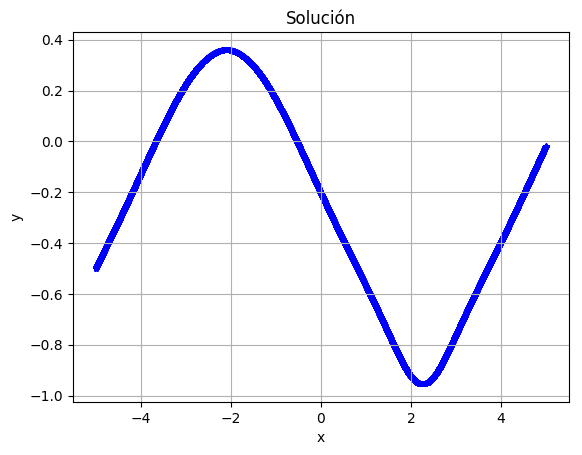

PyObject <matplotlib.text.Text object at 0x7fe5bf52b1d0>

In [10]:
title("Solución")
   scatter(herramientas.eulerFunction((t,x)->[x[2]-(x[2])^3,-x[1]-(x[2])^2]
,-5,5,[-0.5,0.7],0.0001)[1], xcomp.(herramientas.eulerFunction((t,x)->[x[2]-(x[2])^3,-x[1]-(x[2])^2]
,-5,5,[-0.5,0.7],0.0001)[2]), color = "blue",s = 10, marker = "*")
    grid()
   ylabel("y")
    xlabel("x")

In [11]:
?herramientas.eulerFunction

Esta función aplica el método de Euler independiente de la dimensión a una función. La función recibe como argumentos (f,time0,timef,y0,delta) la función (f),los puntos incial (time0) y final del intervalo (timef), [t0,tf], las condiciones inciales (y0), y el tamaño de paso (delta).  La función devuelve un arreglo con el intervalo y un arreglo con la solución, aunque habra que extraer la solución si la dimensión es mayor a 1 .  


### Método de Runge-Kutta

In [12]:
herramientas.espaaciofaserungeKutta2e((t,x)->[x[2]-(x[2])^3,-x[1]-(x[2])^2]
,-5,5,[-0.5,0.7],0.0001)

3-element Array{Array{Any,1},1}:
 Any[-5, -4.9999, -4.9998, -4.9997, -4.9996, -4.9995, -4.9994, -4.9993, -4.9992, -4.9991  …  4.9991, 4.9992, 4.9993, 4.9994, 4.9995, 4.9996, 4.9997, 4.9998, 4.9999, 5.0]                                                                                                                                                                                                                                                                                                       
 Any[[-0.5, 0.7], [-0.499964, 0.700001], [-0.499929, 0.700002], [-0.499893, 0.700003], [-0.499857, 0.700004], [-0.499822, 0.700005], [-0.499786, 0.700006], [-0.49975, 0.700007], [-0.499714, 0.700008], [-0.499679, 0.700009]  …  [-0.0152873, 0.513746], [-0.0152495, 0.513721], [-0.0152117, 0.513696], [-0.0151739, 0.513671], [-0.015136, 0.513646], [-0.0150982, 0.513621], [-0.0150604, 0.513596], [-0.0150226, 0.513572], [-0.0149848, 0.513547], [-0.014947, 0.513522]]
 Any[[0.357, 0.01], [0.357, 0.01], [0

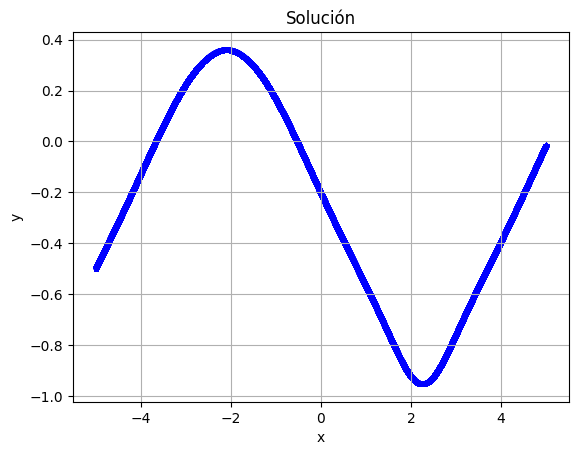

PyObject <matplotlib.text.Text object at 0x7fe5bd0a10d0>

In [13]:
title("Solución")
   scatter(herramientas.espaaciofaserungeKutta2e((t,x)->[x[2]-(x[2])^3,-x[1]-(x[2])^2]
,-5,5,[-0.5,0.7],0.0001)[1], xcomp.(herramientas.espaaciofaserungeKutta2e((t,x)->[x[2]-(x[2])^3,-x[1]-(x[2])^2]
,-5,5,[-0.5,0.7],0.0001)[2]), color = "blue",s = 10, marker = "*")
    grid()
   ylabel("y")
    xlabel("x")

In [14]:
?herramientas.espaaciofaserungeKutta2e

Esta funcion sirve para resover númericamente ecuaciones diferenciales por el método de Runge-Kutta, ya sean sistemas o de cualquier orden orden.  La función recibecomo argumentos (f,t0,t,y0,delta) una función (f),los puntos incial y final del intervalo [t0,tf], las condiciones inciales (y0), y el tamaño de paso (delta).  La función devuelve un arreglo con el intervalo [t0,tf] , un arreglo con la solución y un arreglo con la derivada en cada punto, es perfecta para hacer espacios fase  


### Método de Riemman

In [15]:
herramientas.riemman(0.0, pi, x->sin(x),100)

1.9998355038874436

In [16]:
?herramientas.riemman

"Esta función da una integral númerica usando la definición integral de Riemman. Recibe como argumentos (a,b,f,n) el limite inferior (a), el limite superior (b), la función (f),  así como el tamaño de la partición (n).


### Regla del trapecio

In [17]:
herramientas.trapecio(0.0, pi, x->sin(x),100)

1.9998355038874436

In [18]:
?herramientas.trapecio

Esta función integra numéricamente la función f(x) en el intervalo [a,b] usando la regla  del trapecio.  Recibe como argumentos (f,a,b,n) que son   el limite inferior (a), el limite superior (b), la función f, así como el tamaño de la partición n.


### Regla de Simpson

In [19]:
herramientas.Simpson(0.0, pi, x->sin(x),1000)

1.9999950652019263

In [20]:
?herramientas.Simpson

Esta función integra numéricamente la función f(x) en el intervalo [a,b] usando la regla  de Simpson.  Recibe como argumentos (a,b,f,n) el limite inferior (a), el limite superior (b), la función (f),  así como el tamaño de la partición (n). 


### Método de Euler implicíto

In [21]:
herramientas.eulerFunctionimplicita((t,y)->y-(1/2)*(sin(5*t)*e^((1/2)*t))+5*cos(5*t)*(e^((1/2)*t)),0.0,5.0,0.0,0.01)

2-element Array{Array{Any,1},1}:
 Any[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  4.92, 4.93, 4.94, 4.95, 4.96, 4.97, 4.98, 4.99, 5.0, 5.01]                                                                             
 Any[0.0, 0.0504411, 0.101199, 0.152148, 0.203159, 0.254104, 0.304851, 0.35527, 0.405228, 0.454594  …  -9.14309, -8.68164, -8.20224, -7.70602, -7.19414, -6.66785, -6.12842, -5.57718, -5.01551, -4.44482]

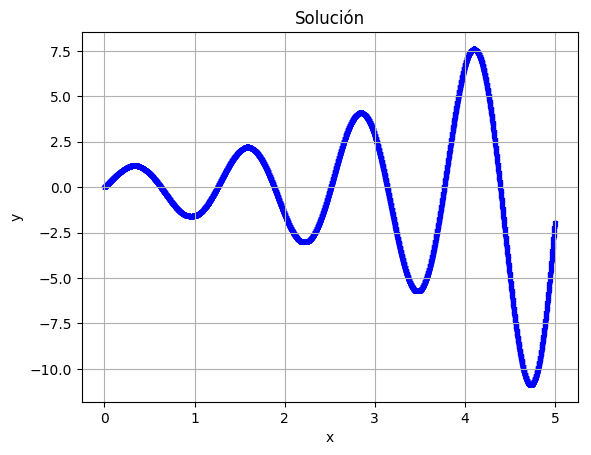

PyObject <matplotlib.text.Text object at 0x7fe5bd01e750>

In [22]:
title("Solución")
   scatter(herramientas.eulerFunctionimplicita((t,y)->y-(1/2)*(sin(5*t)*e^((1/2)*t))+5*cos(5*t)*(e^((1/2)*t)),0.0,5.0,0.0,0.001)[1], herramientas.eulerFunctionimplicita((t,y)->y-(1/2)*(sin(5*t)*e^((1/2)*t))+5*cos(5*t)*(e^((1/2)*t)),0.0,5.0,0.0,0.001)[2], color = "blue",s = 10, marker = "*")
    grid()
   ylabel("y")
    xlabel("x")

In [23]:
?herramientas.eulerFunctionimplicita

Esta función aplica el método de Euler implícito. Recibe como argumentos (f,a,b,n) que son la función f, el limite inferior (a), el limite superior (b), así como el tamaño de la partición n. Devuelve un arreglo con el intervalo y un arreglo con la solución. 
